In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [95]:
data=pd.read_csv("scholarship.csv")

In [96]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


<Axes: xlabel='scholarship_exam_marks', ylabel='Count'>

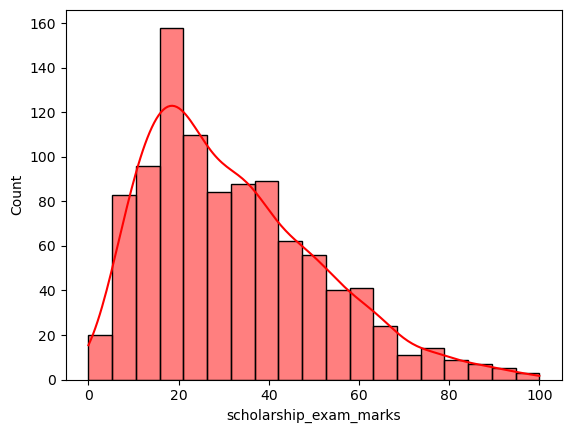

In [97]:
sns.histplot(data["scholarship_exam_marks"], kde=True, color="red")


<Axes: ylabel='scholarship_exam_marks'>

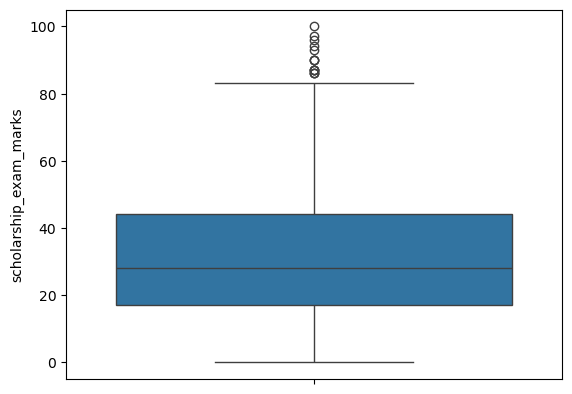

In [98]:
sns.boxplot(data["scholarship_exam_marks"])

In [99]:
Q1 = data["scholarship_exam_marks"].quantile(0.25)
Q3 = data["scholarship_exam_marks"].quantile(0.75)
print ("For Q1:",Q1)
print ("For Q3:",Q3)

For Q1: 17.0
For Q3: 44.0


In [100]:
IQR=Q3-Q1
IQR

np.float64(27.0)

In [101]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [102]:
min= Q1 -1.5 * IQR
max=Q3 + 1.5 * IQR

In [103]:
min

np.float64(-23.5)

In [104]:
max

np.float64(84.5)

## **Trimming**

In [105]:
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

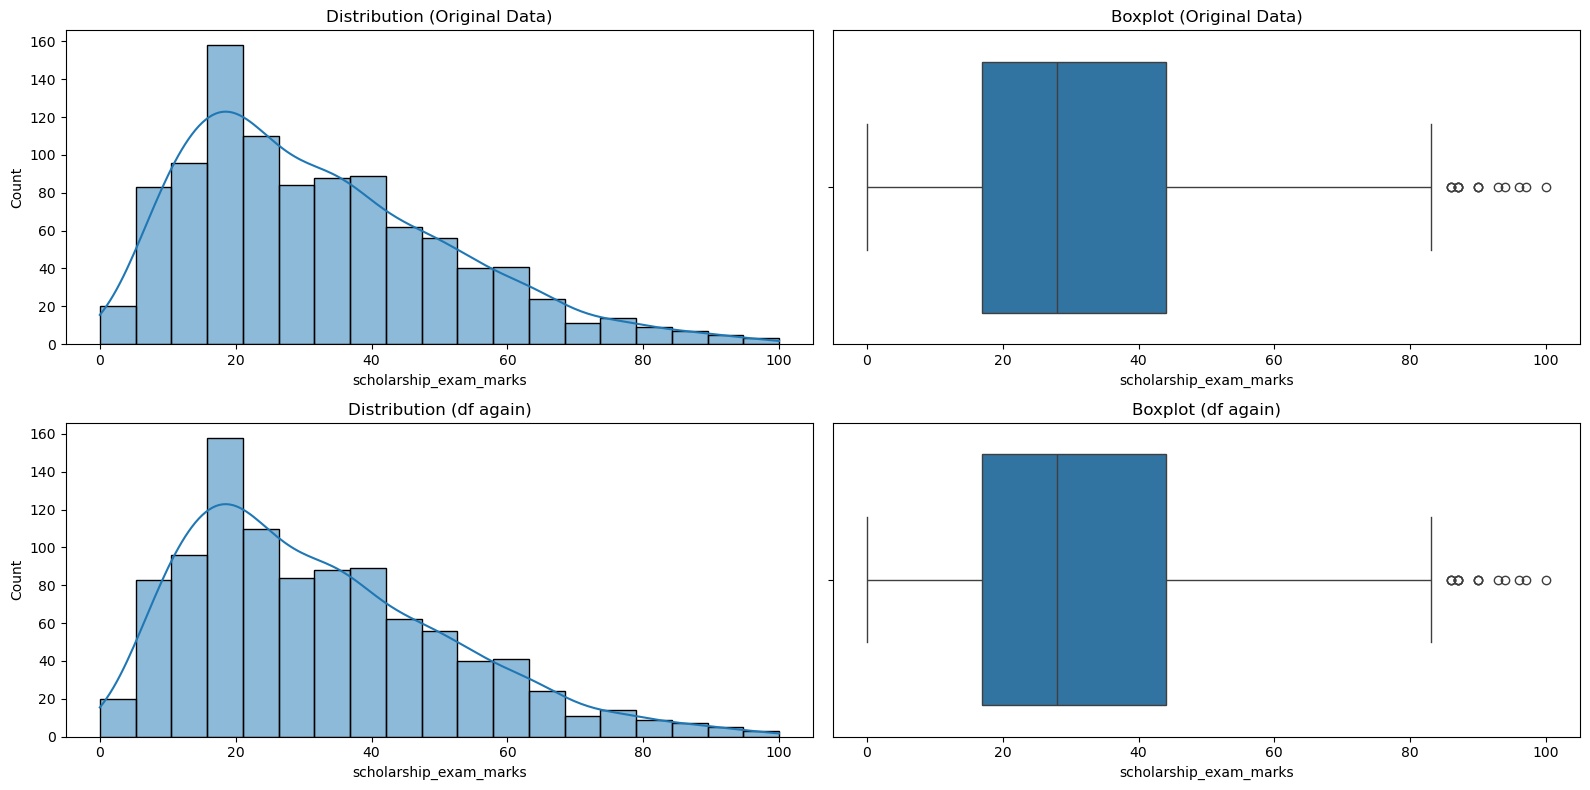

In [106]:
plt.figure(figsize=(16,8))

# 1st subplot - Histogram + KDE
plt.subplot(2,2,1)
sns.histplot(data["scholarship_exam_marks"], kde=True)
plt.title("Distribution (Original Data)")

# 2nd subplot - Boxplot
plt.subplot(2,2,2)
sns.boxplot(x=data["scholarship_exam_marks"])
plt.title("Boxplot (Original Data)")

# 3rd subplot - Histogram + KDE (can reuse df or df after cleaning)
plt.subplot(2,2,3)
sns.histplot(data["scholarship_exam_marks"], kde=True)
plt.title("Distribution (df again)")

# 4th subplot - Boxplot
plt.subplot(2,2,4)
sns.boxplot(x=data["scholarship_exam_marks"])
plt.title("Boxplot (df again)")

plt.tight_layout()
plt.show()


## **Capping**


In [107]:
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,
         max, 
         np.where(data["scholarship_exam_marks"]<min,min, data["scholarship_exam_marks"]))

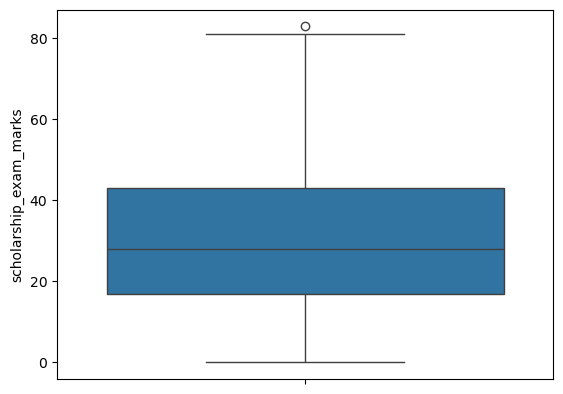

In [108]:
df_clean = data[(data["scholarship_exam_marks"] >= min) & 
                (data["scholarship_exam_marks"] <= max)]

sns.boxplot(df_clean["scholarship_exam_marks"])
plt.show()


In [109]:
min = Q1 - 1.0 * IQR   # stricter
max = Q3 + 1.0 * IQR


In [110]:
new_data2.shape

(1000, 3)

In [111]:
new_data2["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: scholarship_exam_marks, dtype: float64

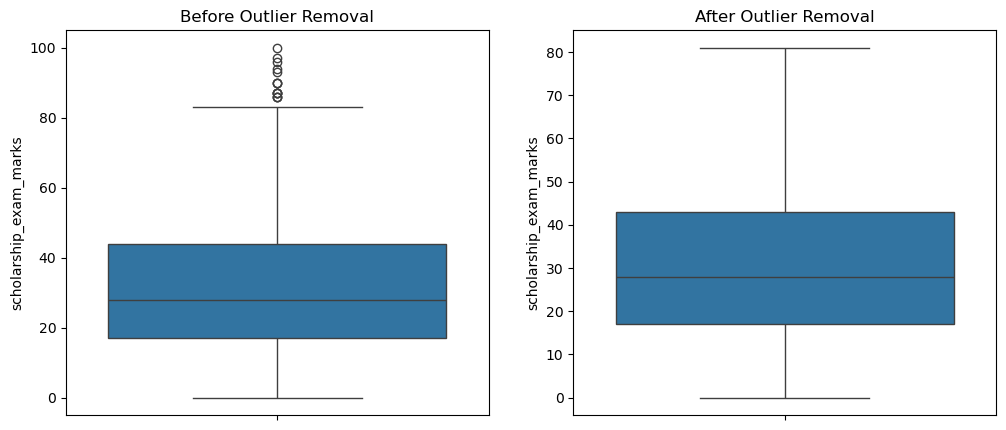

In [112]:
# Function to remove outliers recursively
def remove_outliers_iqr(df, col, k=1.5):
    while True:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        min_val = Q1 - k * IQR
        max_val = Q3 + k * IQR

        df_new = df[(df[col] >= min_val) & (df[col] <= max_val)]
        
        # If nothing changes, break
        if len(df_new) == len(df):
            break
        df = df_new
    return df

# Apply to your data
df_clean = remove_outliers_iqr(data, "scholarship_exam_marks")

# Show before and after plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data["scholarship_exam_marks"], ax=axes[0])
axes[0].set_title("Before Outlier Removal")

sns.boxplot(df_clean["scholarship_exam_marks"], ax=axes[1])
axes[1].set_title("After Outlier Removal")

plt.show()
